# Breakdown of this notebook:
1. **Loading the dataset:** Load the data and import the required libraries. <br>


2. **Analysing the Data:** <br>
    - Checking the Datatype.
    - Checking the Null values.
- Extract the Year and Month columns from the existing date columns
- Create % Columns for Cured & Deaths columns based on the Confirmed case count
- Reverse Engineering - From the cumulative data, extracting daily count for Confirmed, Cured & Deaths columns
- Gropu by the Year and Month columns and get Month wise cumulative data.


3. **Data Visualization:** Using plots to find relations between the features.
- Bar Chart - Null value chart
- Bar Chart - Sate wise Confirmed, Cured and Deaths
- Bar Chart - % of Cured & Deaths case based on Confirmed case
- Pie Chart - Overall state wise Confirmed , Cured and Death %
- Line Chart - Year and Month wise cases
- Line Chart - State wise line chart to show the cases (Confirmed, Cured and Deaths)


In [1]:
# Import required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [2]:
#Load dataset
covid_data = pd.read_csv("covid_19_india.csv", parse_dates=['Date'], dayfirst=True)
covid_data

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
14649,14650,2021-05-07,8:00 AM,Telangana,-,-,405164,2625,481640
14650,14651,2021-05-07,8:00 AM,Tripura,-,-,34153,404,36849
14651,14652,2021-05-07,8:00 AM,Uttarakhand,-,-,154147,3293,220351
14652,14653,2021-05-07,8:00 AM,Uttar Pradesh,-,-,1151571,14501,1425916


In [3]:
#Check the datatype
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14654 entries, 0 to 14653
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       14654 non-null  int64         
 1   Date                      14654 non-null  datetime64[ns]
 2   Time                      14654 non-null  object        
 3   State/UnionTerritory      14654 non-null  object        
 4   ConfirmedIndianNational   14654 non-null  object        
 5   ConfirmedForeignNational  14654 non-null  object        
 6   Cured                     14654 non-null  int64         
 7   Deaths                    14654 non-null  int64         
 8   Confirmed                 14654 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1.0+ MB


#### Data Visualization - Null value chart

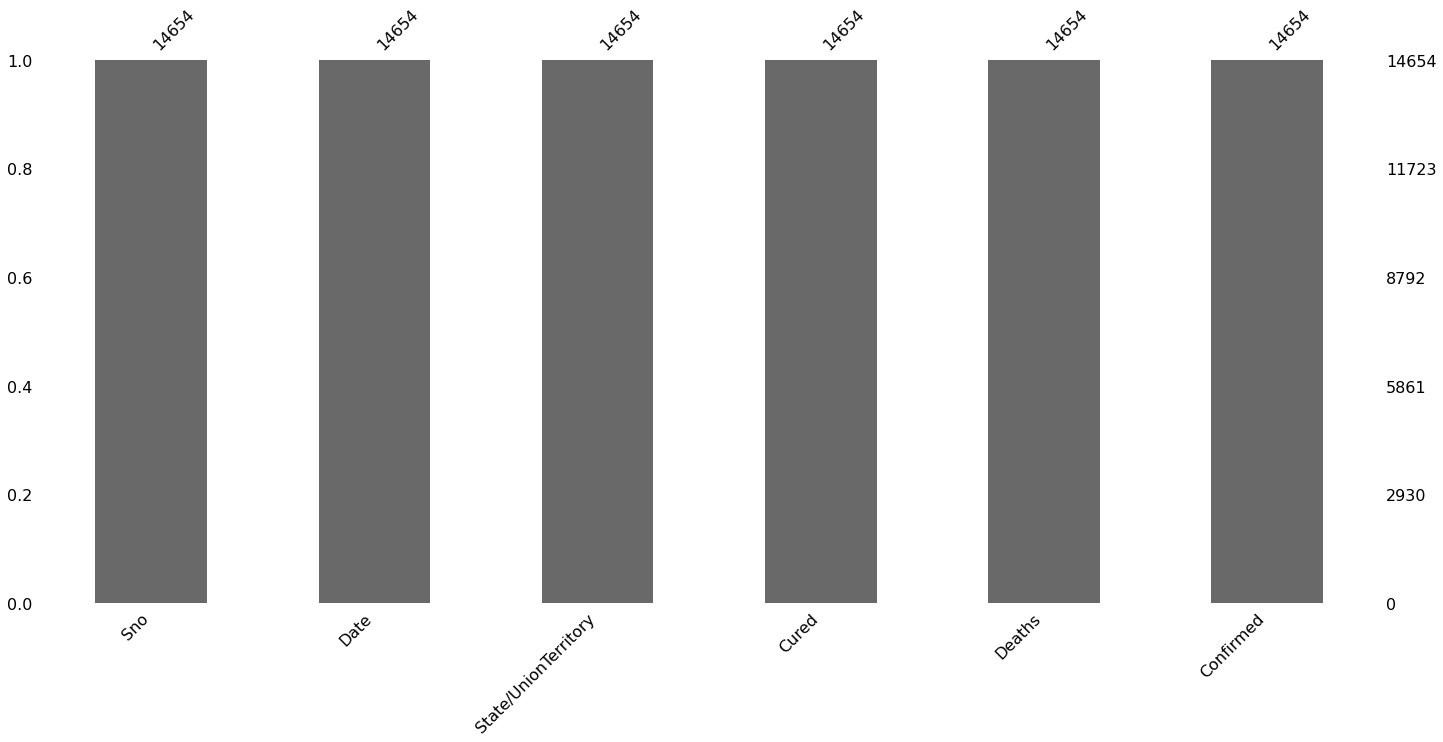

In [4]:
# "Confiremed" column has cover the "ConfirmedIndianNational" & "ConfirmedForeignNational" column value, so we should remove both the columns
covid_data = covid_data[['Sno','Date','State/UnionTerritory','Cured','Deaths','Confirmed']]

# Check the null value
msno.bar(covid_data)

#### Extract the Year and Month columns from the existing date columns

In [5]:
#Extract Year and Month and create separate columns for both.
covid_data['Year'] = covid_data['Date'].dt.year
covid_data['Month'] = covid_data['Date'].dt.month
covid_data

C:\Users\DineshNaik\anaconda3\envs\envbik\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\DineshNaik\anaconda3\envs\envbik\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Sno,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Year,Month
0,1,2020-01-30,Kerala,0,0,1,2020,1
1,2,2020-01-31,Kerala,0,0,1,2020,1
2,3,2020-02-01,Kerala,0,0,2,2020,2
3,4,2020-02-02,Kerala,0,0,3,2020,2
4,5,2020-02-03,Kerala,0,0,3,2020,2
...,...,...,...,...,...,...,...,...
14649,14650,2021-05-07,Telangana,405164,2625,481640,2021,5
14650,14651,2021-05-07,Tripura,34153,404,36849,2021,5
14651,14652,2021-05-07,Uttarakhand,154147,3293,220351,2021,5
14652,14653,2021-05-07,Uttar Pradesh,1151571,14501,1425916,2021,5


#### Data Visualization - Sate wise Confirmed, Cured and Deaths

C:\Users\DineshNaik\anaconda3\envs\envbik\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


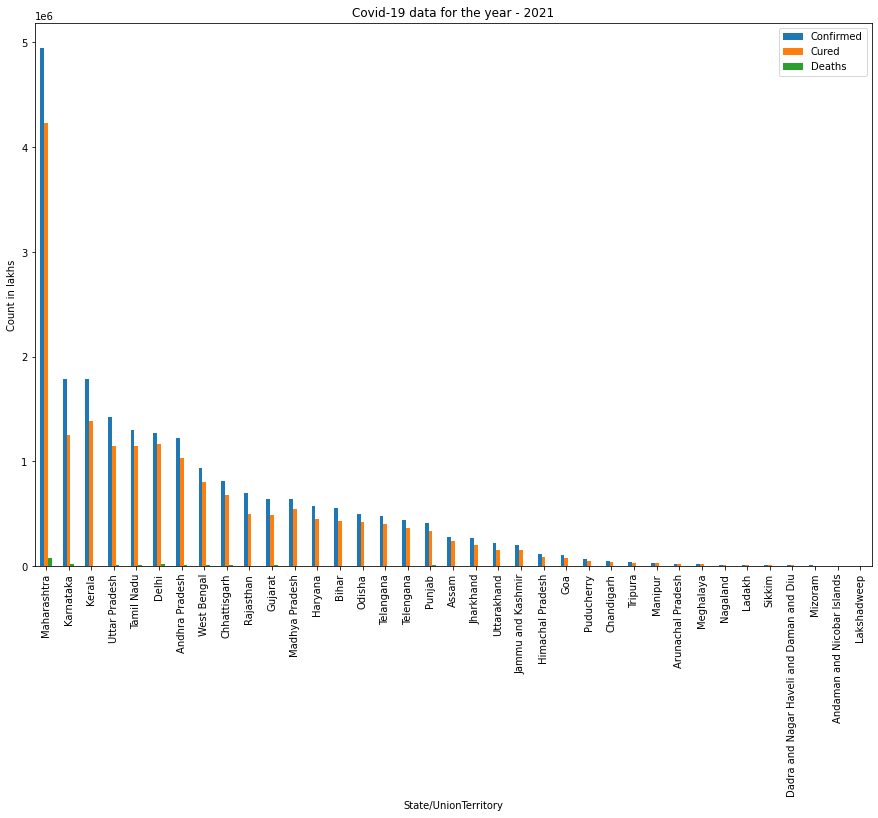

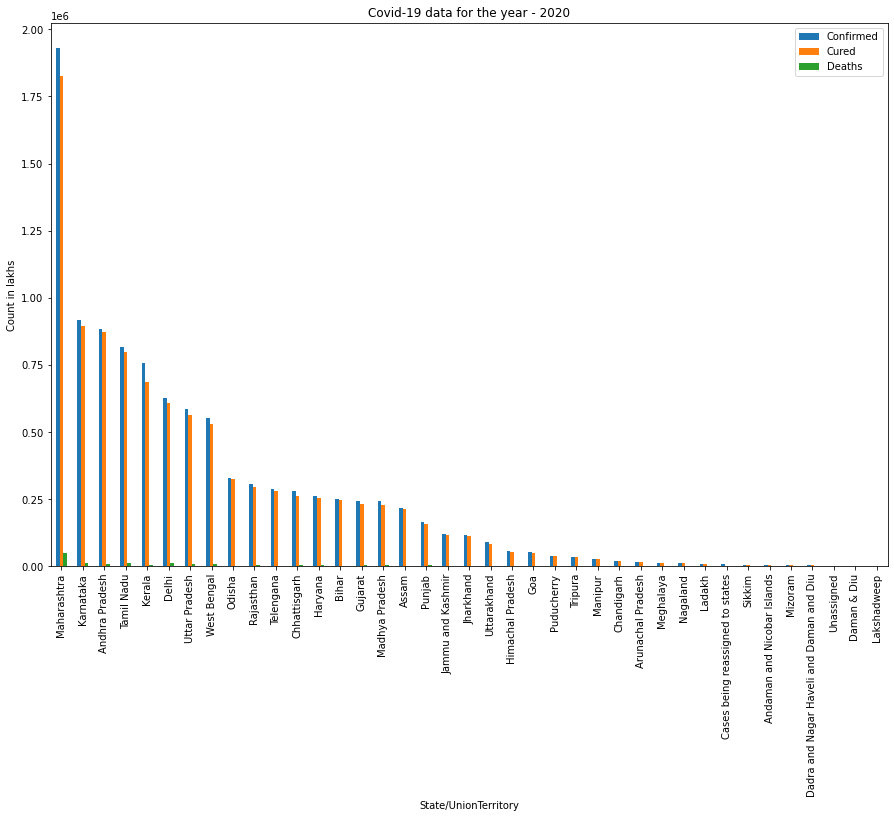

In [6]:
grp_covid_data = covid_data.groupby(['Year','State/UnionTerritory'])['Cured','Deaths','Confirmed'].max().reset_index()
grp_covid_data.sort_values(['Confirmed','Cured','Deaths'],ascending=False,inplace=True) 
for yr in grp_covid_data['Year'].unique().tolist():
    yr_covid_data = grp_covid_data[grp_covid_data['Year']==yr]
    yr_covid_data.plot(x='State/UnionTerritory',y=['Confirmed','Cured','Deaths'],kind="bar", figsize=(15,10))
    plt.title("Covid-19 data for the year - {}".format(yr))
    plt.ylabel("Count in lakhs")

#### Create % Columns for Cured & Deaths based on the Confirmed case count

In [7]:
# Get the Cured and Deaths percentage based on the Confirmed cases
grp_covid_data['Cured(%)'] = round(grp_covid_data['Cured']*100/grp_covid_data['Confirmed'],2)
grp_covid_data['Deaths(%)'] = round(grp_covid_data['Deaths']*100/grp_covid_data['Confirmed'],2)


In [8]:
#Top 20 states where confired cases are high.
top_20_state = grp_covid_data[grp_covid_data['Year']==2021].nlargest(20,'Confirmed')['State/UnionTerritory'].tolist()
top_20_state

['Maharashtra',
 'Karnataka',
 'Kerala',
 'Uttar Pradesh',
 'Tamil Nadu',
 'Delhi',
 'Andhra Pradesh',
 'West Bengal',
 'Chhattisgarh',
 'Rajasthan',
 'Gujarat',
 'Madhya Pradesh',
 'Haryana',
 'Bihar',
 'Odisha',
 'Telangana',
 'Telengana',
 'Punjab',
 'Assam',
 'Jharkhand']

#### Data Visualization - % of Cured & Deaths case based on Confirmed case

In [9]:
# Data preparation function for Cured and Deaths
def cured_death_per(col):
    grp_covid_data.sort_values([col],ascending=False,inplace=True)
    fig,ax = plt.subplots(2,1)

    for ind,yr in enumerate(grp_covid_data['Year'].unique().tolist()):
        yr_covid_data = grp_covid_data[grp_covid_data['Year']==yr]
        yr_covid_data.plot(x='State/UnionTerritory',y=col, ax=ax[ind],title=("Covid-19 {} based on the confirmed case - {}".format(col,yr))
                           ,kind="bar", figsize=(15,10))
        #ax[ind].plot.title("Covid-19 data for the year - {}".format(yr))
        ax[ind].set_ylabel(col)
        mean = grp_covid_data[col].mean()
        ax[ind].axhline(mean)

    #fig.tight_layout() 
    # set the spacing between subplots
    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=2)

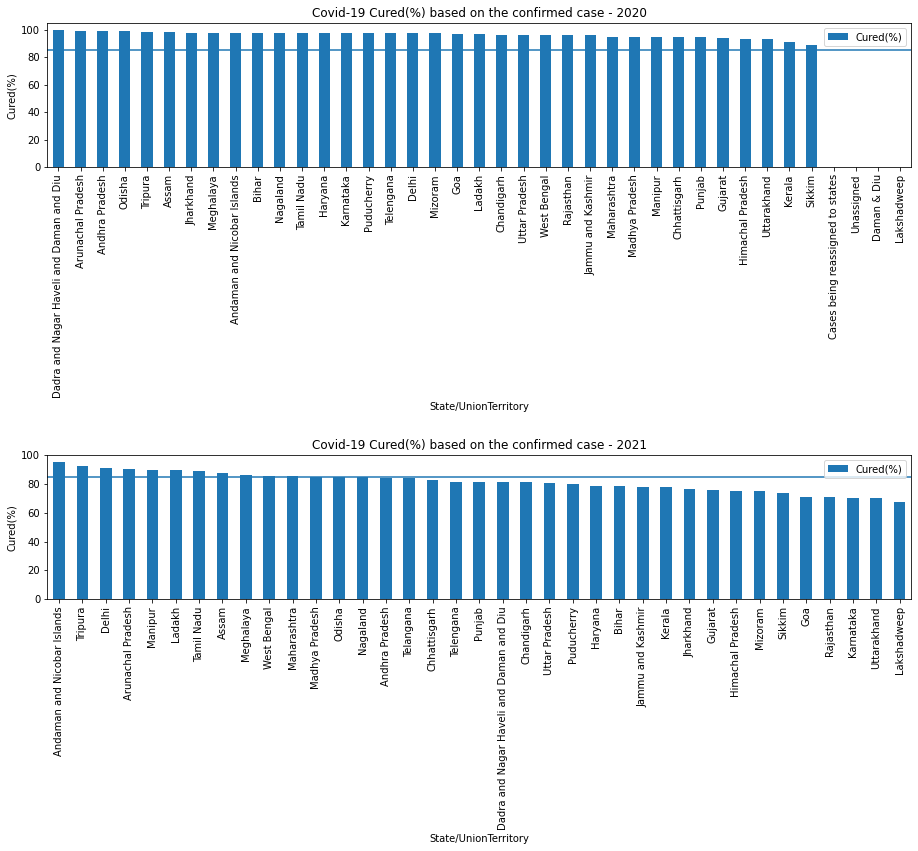

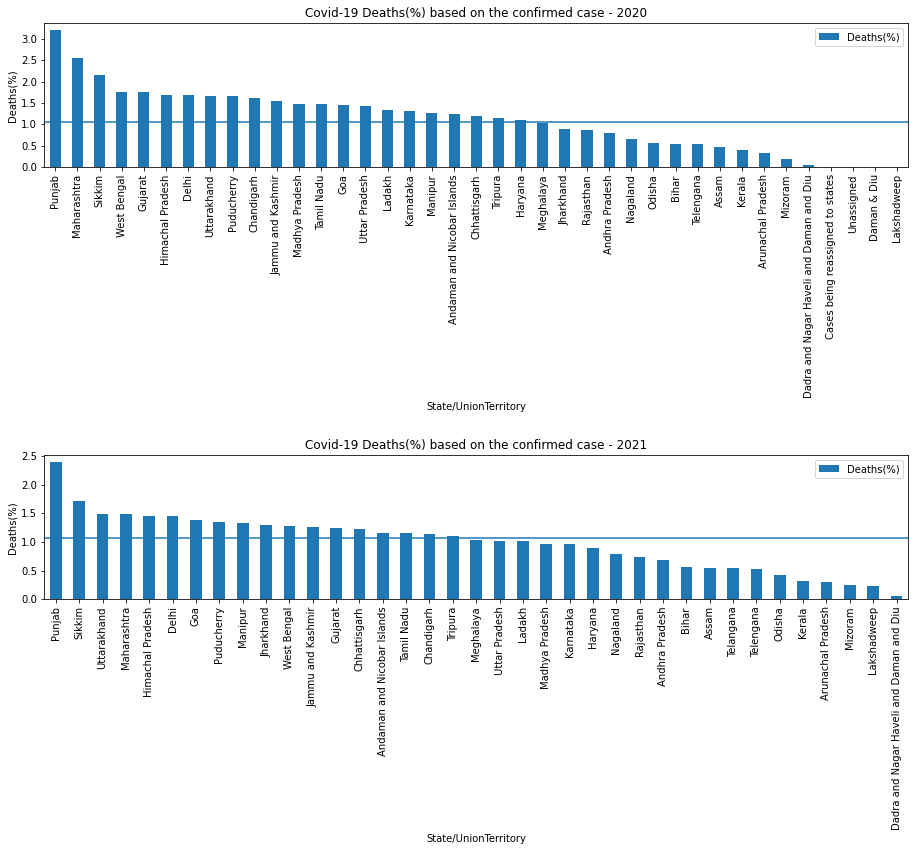

In [10]:
# Get the cured % graph
cured_death_per('Cured(%)')
# Get the Deaths % graph
cured_death_per('Deaths(%)')

#### Data Visualization - Overall state wise Confirmed , Cured and Death %

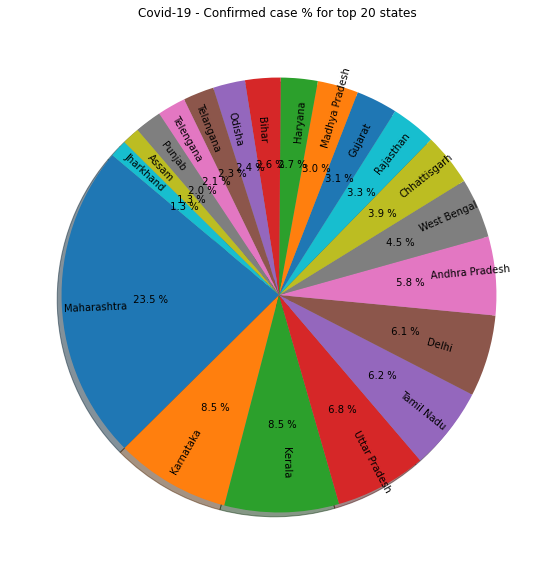

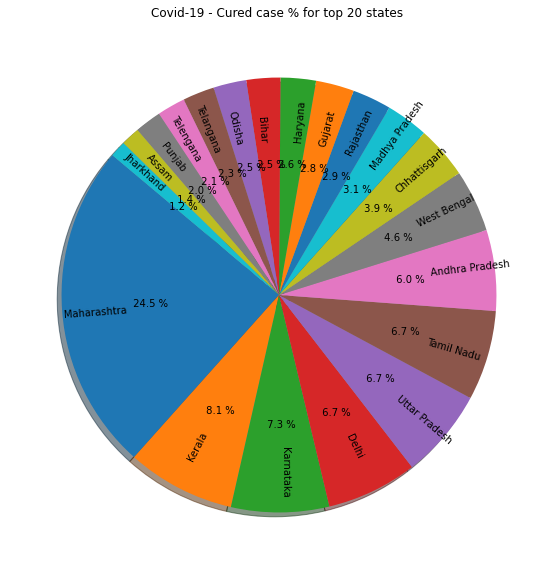

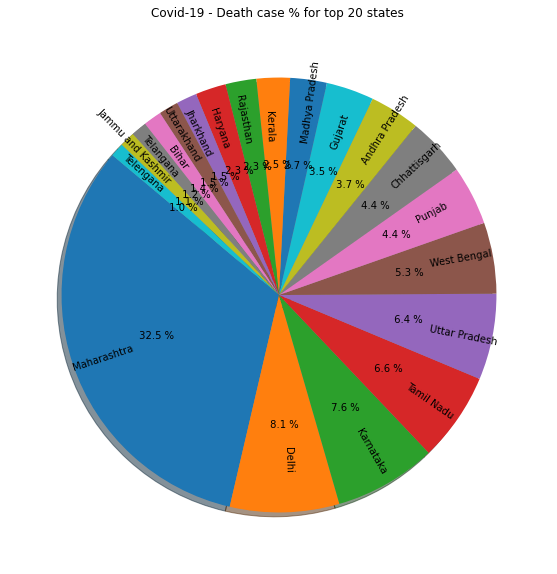

In [11]:
#Top 20 states where confired cases are high.
top_20_state = grp_covid_data[grp_covid_data['Year']==2021].nlargest(20,'Confirmed')['State/UnionTerritory'].tolist()
fig1, ax1 = plt.subplots(figsize=(15, 10))

#Confirmed case
plt.pie(grp_covid_data[grp_covid_data['Year']==2021].nlargest(20,'Confirmed')['Confirmed'], labels = top_20_state ,autopct ='% 1.1f %%',labeldistance=0.7,rotatelabels = 270,startangle=140, shadow = True)
plt.title('Covid-19 - Confirmed case % for top 20 states ')
plt.show()

#Cured case
top_20_state = grp_covid_data[grp_covid_data['Year']==2021].nlargest(20,'Cured')['State/UnionTerritory'].tolist()
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.pie(grp_covid_data[grp_covid_data['Year']==2021].nlargest(20,'Cured')['Cured'], labels = top_20_state ,autopct ='% 1.1f %%',labeldistance=0.7,rotatelabels = 270,startangle=140, shadow = True)
plt.title('Covid-19 - Cured case % for top 20 states ')
plt.show()

#Deaths case
top_20_state = grp_covid_data[grp_covid_data['Year']==2021].nlargest(20,'Deaths')['State/UnionTerritory'].tolist()
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.pie(grp_covid_data[grp_covid_data['Year']==2021].nlargest(20,'Deaths')['Deaths'], labels = top_20_state ,autopct ='% 1.1f %%',labeldistance=0.7,rotatelabels = 270,startangle=140, shadow = True)
plt.title('Covid-19 - Death case % for top 20 states ')
plt.show()

#### Reverse Engineering - From the cumulative data, extracting daily count for Confirmed, Cured & Deaths columns

In [12]:
def daily_counts(State):
    data = covid_data[(covid_data['State/UnionTerritory']==State)].sort_values(['Date','State/UnionTerritory','Confirmed','Cured','Deaths'],ascending=False)

    lst_data_index = data.index.tolist()
    data_len = len(lst_data_index)



    for ind,val in enumerate(lst_data_index):
        if data_len-1 == ind:
            covid_data['daily_cured_count'].iloc[val] = covid_data.iloc[lst_data_index[ind]]['Cured']
            covid_data['daily_death_count'].iloc[val] = covid_data.iloc[lst_data_index[ind]]['Deaths']
            covid_data['daily_confirmed_count'].iloc[val] = covid_data.iloc[lst_data_index[ind]]['Confirmed']
        else:    
            covid_data['daily_cured_count'].iloc[val] = covid_data.iloc[lst_data_index[ind]]['Cured'] - covid_data.iloc[lst_data_index[ind+1]]['Cured']
            covid_data['daily_death_count'].iloc[val] = covid_data.iloc[lst_data_index[ind]]['Deaths'] - covid_data.iloc[lst_data_index[ind+1]]['Deaths']
            covid_data['daily_confirmed_count'].iloc[val] = covid_data.iloc[lst_data_index[ind]]['Confirmed'] - covid_data.iloc[lst_data_index[ind+1]]['Confirmed']
    #print ('State Done --- ',State)

In [13]:
covid_data['daily_cured_count'] = np.nan
covid_data['daily_death_count'] = np.nan
covid_data['daily_confirmed_count'] = np.nan

for State in covid_data['State/UnionTerritory'].unique().tolist():
    daily_counts(State)
    
covid_data   

C:\Users\DineshNaik\anaconda3\envs\envbik\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Sno,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Year,Month,daily_cured_count,daily_death_count,daily_confirmed_count
0,1,2020-01-30,Kerala,0,0,1,2020,1,0.0,0.0,1.0
1,2,2020-01-31,Kerala,0,0,1,2020,1,0.0,0.0,0.0
2,3,2020-02-01,Kerala,0,0,2,2020,2,0.0,0.0,1.0
3,4,2020-02-02,Kerala,0,0,3,2020,2,0.0,0.0,1.0
4,5,2020-02-03,Kerala,0,0,3,2020,2,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14649,14650,2021-05-07,Telangana,405164,2625,481640,2021,5,9122.0,46.0,5892.0
14650,14651,2021-05-07,Tripura,34153,404,36849,2021,5,149.0,1.0,315.0
14651,14652,2021-05-07,Uttarakhand,154147,3293,220351,2021,5,4981.0,151.0,8517.0
14652,14653,2021-05-07,Uttar Pradesh,1151571,14501,1425916,2021,5,28902.0,350.0,26622.0


#### Gropu by the Year and Month columns and get Month wise cumulative data

In [14]:
month_covid_data = covid_data.groupby(['Year','Month'])['daily_cured_count','daily_death_count','daily_confirmed_count'].sum().reset_index()
month_covid_data['Year-Month'] = month_covid_data[['Year','Month']].astype(str).apply(lambda x: '-'.join(x), axis=1)
month_covid_data

C:\Users\DineshNaik\anaconda3\envs\envbik\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Year,Month,daily_cured_count,daily_death_count,daily_confirmed_count,Year-Month
0,2020,1,0.0,0.0,1.0,2020-1
1,2020,2,0.0,0.0,2.0,2020-2
2,2020,3,124.0,35.0,1394.0,2020-3
3,2020,4,8249.0,1040.0,32010.0,2020-4
4,2020,5,78611.0,4089.0,148813.0,2020-5
5,2020,6,247838.0,11729.0,384699.0,2020-6
6,2020,7,722983.0,18854.0,1072193.0,2020-7
7,2020,8,1716996.0,28722.0,1982375.0,2020-8
8,2020,9,2413024.0,33028.0,2604518.0,2020-9
9,2020,10,2245004.0,24144.0,1911356.0,2020-10


#### Data Visualization - Year and Month wise cases through line chart

Text(0, 0.5, 'Count in lakhs')

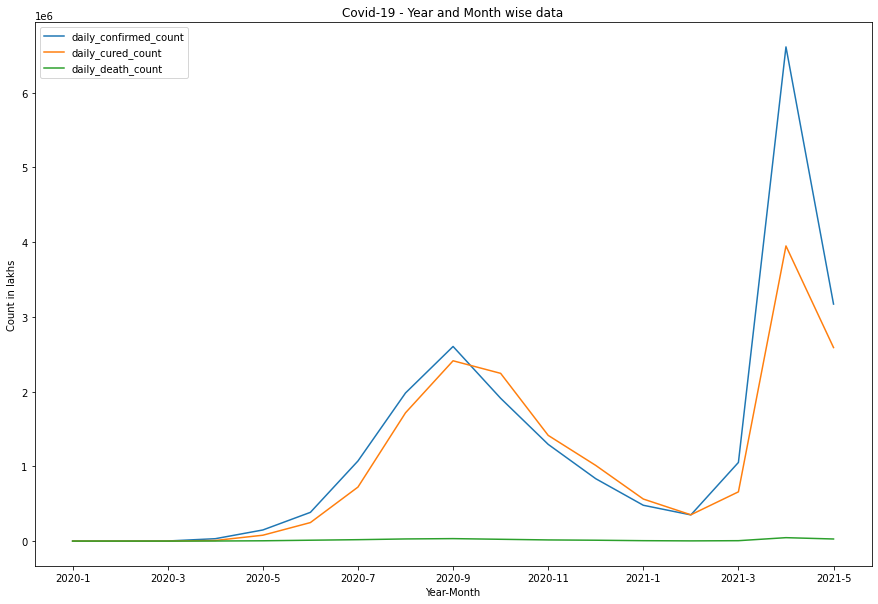

In [15]:
month_covid_data.plot(x='Year-Month',y=['daily_confirmed_count','daily_cured_count','daily_death_count'],kind="line", figsize=(15,10))
plt.title("Covid-19 - Year and Month wise data")
plt.ylabel("Count in lakhs")

In [16]:
# Get Top 20 Confirmed states
month_covid_data = covid_data.groupby(['Year','Month','State/UnionTerritory'])['daily_cured_count','daily_death_count','daily_confirmed_count'].sum().reset_index()
month_covid_data['Year-Month'] = month_covid_data[['Year','Month']].astype(str).apply(lambda x: '-'.join(x), axis=1)
data = month_covid_data[month_covid_data['State/UnionTerritory'].isin(top_20_state)].sort_values(['Year','Month','State/UnionTerritory'],ascending=False)

C:\Users\DineshNaik\anaconda3\envs\envbik\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [17]:
month_covid_data[month_covid_data['State/UnionTerritory'].isin(top_20_state)]

,Year,Month,State/UnionTerritory,daily_cured_count,daily_death_count,daily_confirmed_count,Year-Month
0,2020,1,Kerala,0.0,0.0,1.0,2020-1
1,2020,2,Kerala,0.0,0.0,2.0,2020-2
3,2020,3,Andhra Pradesh,1.0,0.0,40.0,2020-3
4,2020,3,Bihar,0.0,1.0,15.0,2020-3
6,2020,3,Chhattisgarh,0.0,0.0,8.0,2020-3
...,...,...,...,...,...,...,...
524,2021,5,Telangana,405164.0,2625.0,481640.0,2021-5
525,2021,5,Telengana,6542.0,51.0,7754.0,2021-5
527,2021,5,Uttar Pradesh,255094.0,2263.0,207964.0,2021-5
528,2021,5,Uttarakhand,30101.0,791.0,45484.0,2021-5


#### Data Visualization - State wise line chart to show the cases (Confirmed, Cured and Deaths)

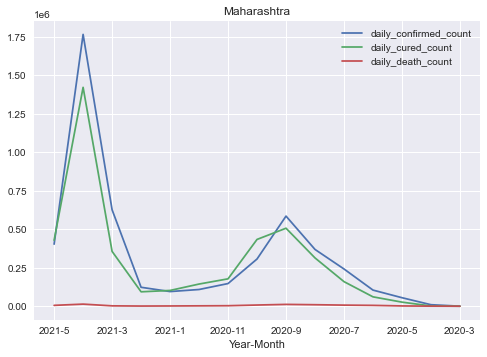

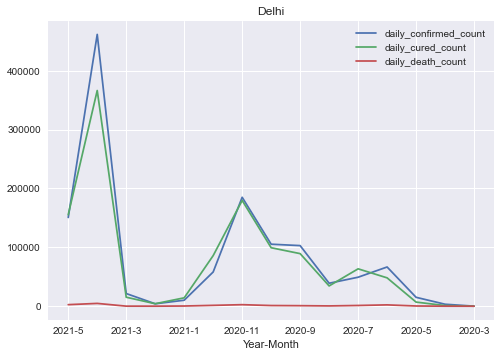

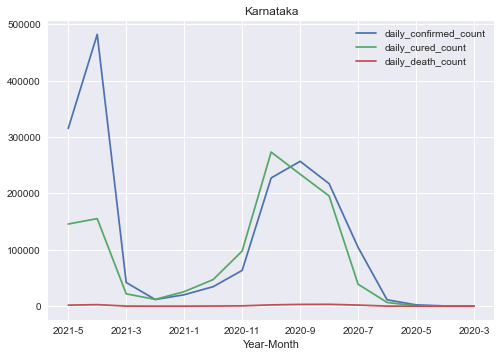

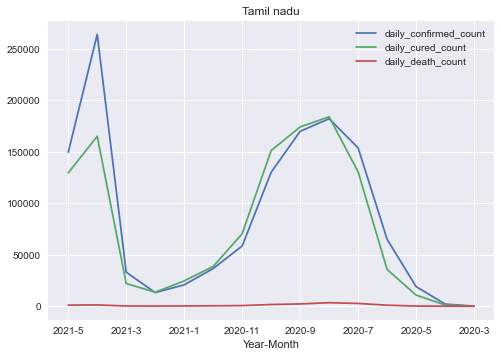

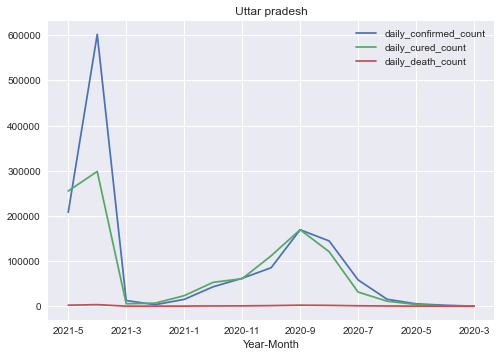

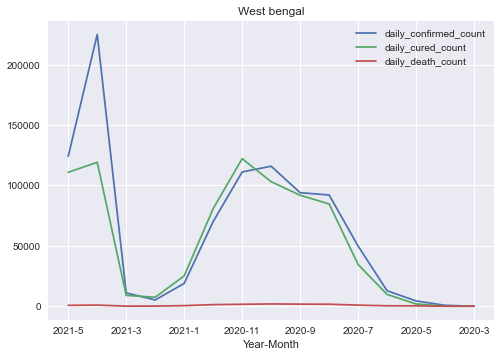

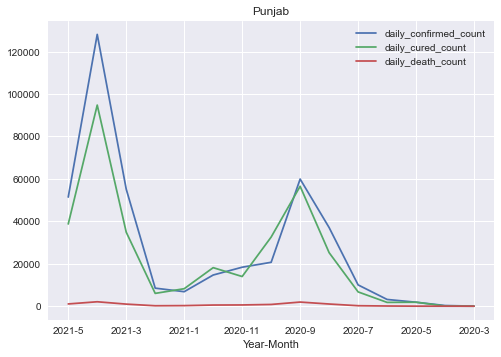

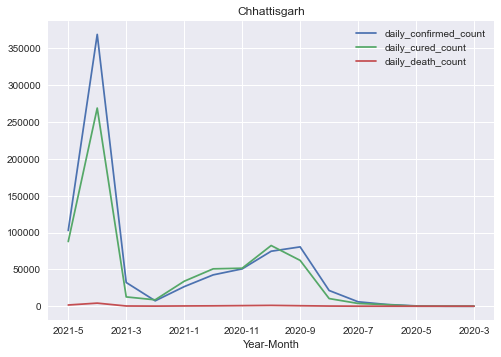

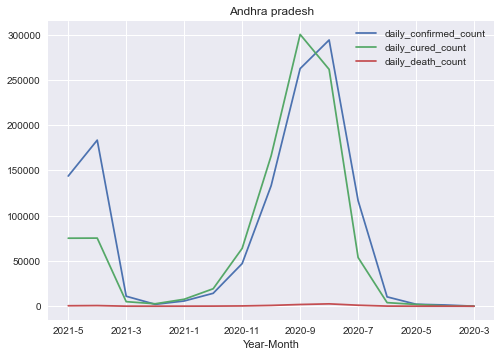

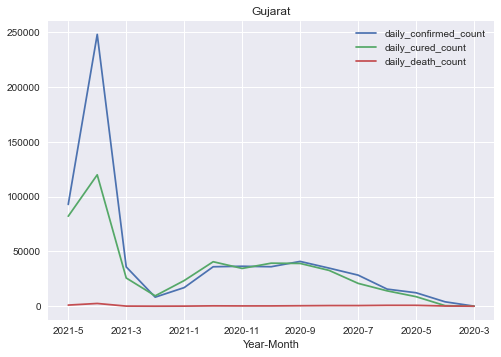

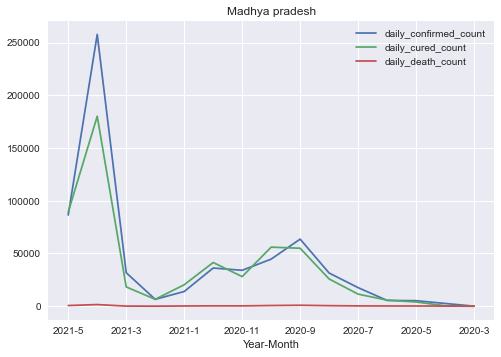

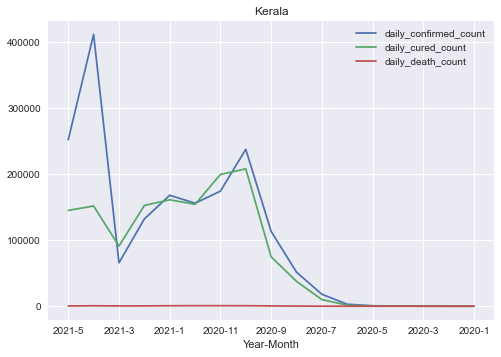

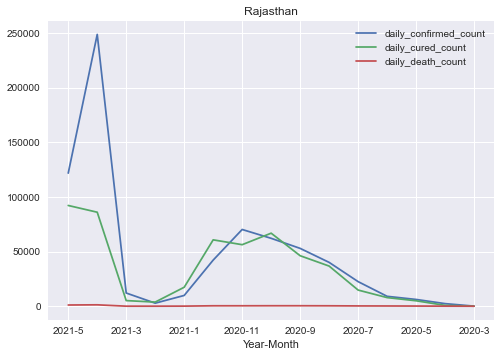

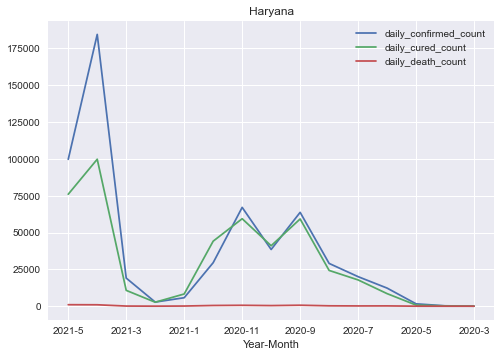

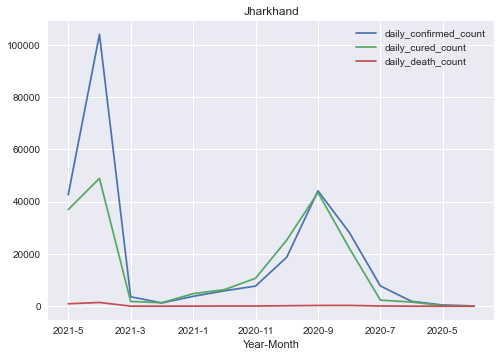

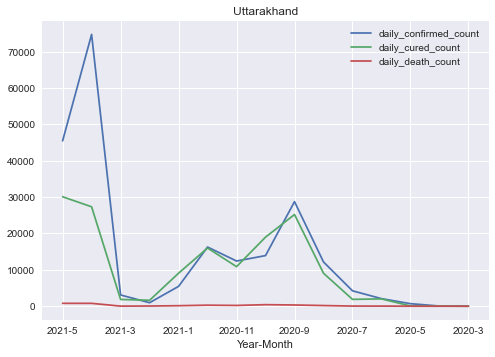

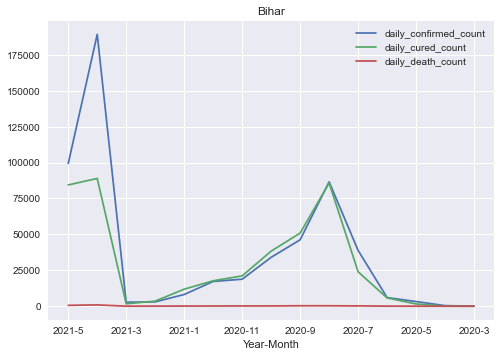

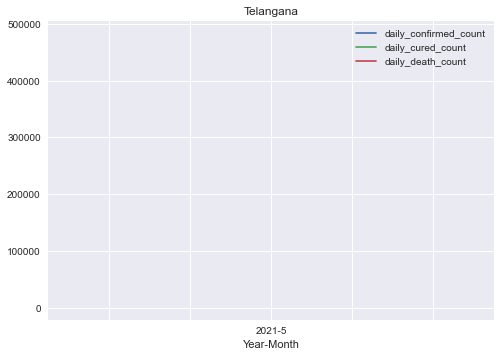

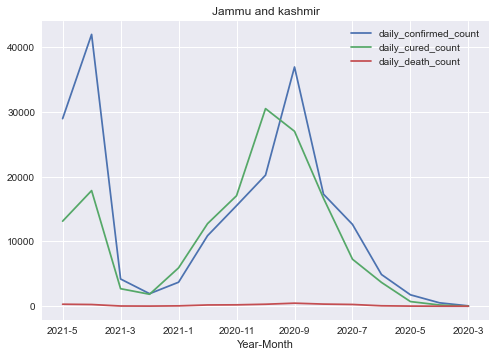

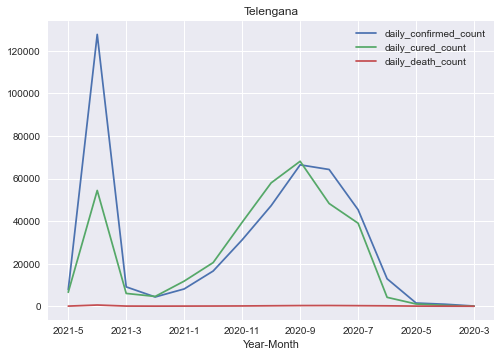

In [18]:
plt.style.use('seaborn')

for name in top_20_state:
    sub = data[data['State/UnionTerritory'] == name]
    sub.plot(y=['daily_confirmed_count','daily_cured_count','daily_death_count'],x='Year-Month',kind='line',title=name.capitalize())